This demo will show how to programmatically access the Google Earth Engine API to obtain a time series of satellite images for a given time window and region. 

Prerequisites:
- Google Earth Engine Python API package: ee
- Third party Earth Engine wrapper package: geemap
- GeoTIFF read, transform, and write package: rasterio


In [1]:
import ee 
import geemap
from datetime import datetime
import numpy as np
import rasterio #for reading images
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
 def cloudscore(image):
        '''
        Inner function for computing cloud score such that we can remove 
        bad images from the landsat collections we download.
        Implementation in javascript can be found of Google Earth Engine 
        website under (landsat algorithms), translation to python by KH.
        Further help from Nicholas Clinton at 
        https://urldefense.com/v3/__https://gis.stackexchange.com/questions/252685/filter-landsat-images-base-on-cloud-cover-over-a-region-of-interest*5Cn__;JQ!!LLK065n_VXAQ!zP9K-68-_oPkaNWFZdbTYYnai85ggL4j3FhdqssLkim-RneBr2NqD6Ka4fu6yw-v$         '''
        cloud = ee.Algorithms.Landsat.simpleCloudScore(image).select('cloud')
        cloudiness = cloud.reduceRegion(ee.Reducer.mean(),
                                        geometry=region,
                                        scale=30)
        image = image.set(cloudiness)
        return image

In [4]:
# Trigger the authentication flow
ee.Authenticate()

# Initialize the library
ee.Initialize()

Enter verification code: 4/1AX4XfWijlNyEbbiYQF-Ess36OOeV7SGzC853G8puJRPCeYxNELwWO16Ftug

Successfully saved authorization token.


This is where we define the lat-long bounding box that defines the region for our satellite images. Notice how that bounding box starts and ends in the same place

In [9]:

# # bbox = [(-118.5218120749397,36.99786234125541),
# #     (-118.51807843999097,36.99786234125541),
# #     (-118.51807843999097,37.00010729974639),
# #     (-118.5218120749397,37.00010729974639),
# #     (-118.5218120749397,36.99786234125541)]

# # = [(7.0089096, 45.978629149999996),
# #  (7.0466264, 45.978629149999996),
# #  (7.0466264, 46.02018385),
# #  (7.0089096, 46.02018385),
# #  (7.0089096, 45.978629149999996)]

# # format:
# #     bbox = [(),
# #     (-118.51270890110236,37.006279860016086),
# #     (-118.5332653509925,37.006279860016086),
# #     (-118.5332653509925,36.99695760726187)]

# #this one was my dataset

# #  bbox = [(-118.51270890110236,36.99695760726187),
# #     (-118.51270890110236,37.006279860016086),
# #     (-118.5332653509925,37.006279860016086),
# #     (-118.5332653509925,36.99695760726187)]

# bbox =[(79.8096398872554,42.295437794411406),
# (79.8096398872554,42.169352359125746),
# (80.24634643022415,42.169352359125746),
# (80.24634643022415,42.295437794411406)]

Here we obtain an EE image collection for LANDSAT 8 from a specified date range and region

In [10]:

# start_date = datetime(1999,1,1)
# end_date = datetime(2003,1,1)

# region = ee.Geometry.Polygon(bbox)

# collection = ee.ImageCollection('LANDSAT/LE07/C01/T1_TOA').filterDate(start_date,end_date).filterBounds(region)

Here we filter out cloudy images. The lower the cloud_tol, the less cloud tolerance

In [11]:
# cloud_tol=15
# collection= collection.map(algorithm=cloudscore).filter(ee.Filter.lt('cloud', cloud_tol))

To see a full list of Landsat 8 bands visit: https://urldefense.com/v3/__https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T2_SR__;!!LLK065n_VXAQ!zP9K-68-_oPkaNWFZdbTYYnai85ggL4j3FhdqssLkim-RneBr2NqD6Ka4QdkmbFN$ . Here we select: B2-blue; B3-green; B4-red; B5-near infrared; B6-shortwave infrared 1; B7-shortwave infrared 2; 

In [12]:
# # collection = collection.select(['B5'])
# collection = collection.select(['B1','B2','B3', 'B4', 'B5', 'B6_VCID_1', 'B6_VCID_2', 'B7', 'B8'])


In [15]:
# collection_list = collection.toList(collection.size())
# # type(collection_list)
# collection_size = collection_list.size().getInfo()
# dates = geemap.image_dates(collection, date_format='YYYY-MM-dd').getInfo()

In [16]:
# dates

['2000-08-12',
 '2000-09-13',
 '2001-10-02',
 '2002-07-17',
 '2002-08-18',
 '2002-10-05',
 '1999-07-16',
 '1999-08-17',
 '1999-12-07',
 '2001-08-22',
 '2002-06-22',
 '2002-07-24',
 '2002-08-25',
 '1999-07-16',
 '1999-08-17',
 '1999-12-07',
 '2001-08-22',
 '2001-09-07',
 '2002-06-22',
 '2002-07-24',
 '2002-08-25']

Next, we will write the images from the image collection to our local machine as a geotiff

In [39]:

# list_a = []
# for i, date in enumerate(dates):
#     image = ee.Image(collection_list.get(i))
#     geemap.ee_export_image(image, filename = "Engilchek_glacier_{}.tif".format(date), scale = 100, region = region, file_per_band = False)
# #     list_a.append(filename)

In [6]:
def band_select(bands):
    
    bbox =[(79.8096398872554,42.295437794411406),
(79.8096398872554,42.169352359125746),
(80.24634643022415,42.169352359125746),
(80.24634643022415,42.295437794411406)]

    start_date = datetime(1999,1,1)
    end_date = datetime(2003,1,1)

    region = ee.Geometry.Polygon(bbox)

    collection = ee.ImageCollection('LANDSAT/LE07/C01/T1_TOA').filterDate(start_date,end_date).filterBounds(region)
    
    collection = collection.select(bands)
    collection_list = collection.toList(collection.size())

    # type(collection_list)
    collection_size = collection_list.size().getInfo()
    dates = geemap.image_dates(collection, date_format='YYYY-MM-dd').getInfo()
    

#     list_a = []
    for i, date in enumerate(dates):
        image = ee.Image(collection_list.get(i))
        geemap.ee_export_image(image, filename = "Engilchek_glacier_{}.tif".format(date), scale = 100, region = region, file_per_band = False)
    return dates, bbox, region
    #     list_a.append(filename)
#     image_names = []
#     for i, date in enumerate(dates):
#         image_names.append("Engilchek_Glacier_{}.tif".format(date))

In [38]:
dates, bbox, region = band_select(['B1','B2','B3'])

Generating URL ...
Data downloaded to C:\Users\Administrator\ee folder\Engilchek_glacier_1999-07-09.tif
Generating URL ...
Data downloaded to C:\Users\Administrator\ee folder\Engilchek_glacier_1999-07-25.tif
Generating URL ...
Data downloaded to C:\Users\Administrator\ee folder\Engilchek_glacier_1999-08-10.tif
Generating URL ...
Data downloaded to C:\Users\Administrator\ee folder\Engilchek_glacier_1999-08-26.tif
Generating URL ...
Data downloaded to C:\Users\Administrator\ee folder\Engilchek_glacier_1999-10-13.tif
Generating URL ...
Data downloaded to C:\Users\Administrator\ee folder\Engilchek_glacier_1999-11-30.tif
Generating URL ...
Data downloaded to C:\Users\Administrator\ee folder\Engilchek_glacier_1999-12-16.tif
Generating URL ...
Data downloaded to C:\Users\Administrator\ee folder\Engilchek_glacier_2000-01-17.tif
Generating URL ...
Data downloaded to C:\Users\Administrator\ee folder\Engilchek_glacier_2000-02-18.tif
Generating URL ...
Data downloaded to C:\Users\Administrator\ee 

We will to use rasterio to read the geotiff from our local machine

In [34]:
# # "LANDSAT7_{}.tif".format(date)
# image_names = []
# for i, date in enumerate(dates):
#     image_names.append("Engilchek_Glacier_{}.tif".format(date))

In [35]:
#image_names

In [40]:
with rasterio.open('Engilchek_Glacier_2001-10-02.tif') as src:
    first_band = src.read(1)
    img = src.read()
# print(img.shape)
#LANDSAT8_2020-01-25.tif
#LANDSAT7_1999-08-17.tif

Finally, we can view our image with matplotlib's pyplot

(145, 363, 3)


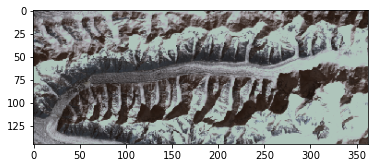

In [41]:
rolled_img = np.rollaxis(img, 0,3)
print(rolled_img.shape)
plt.imshow(rolled_img[:,:,0:3])

In [42]:
s_imgs = []
for i in range(len(dates)):
    with rasterio.open('Engilchek_Glacier_2001-10-02.tif') as src:
        first_band = src.read(1)
        img = src.read()
        s_imgs.append(img)
s_imgs = np.array(s_imgs)
# print(img.shape)
#LANDSAT8_2020-01-25.tif
#LANDSAT7_1999-08-17.tif

In [44]:
# band 1,2,3 clips the data, and 5 as well it seems

In [99]:
### Do some research and apply different bands

In [100]:
### Perhaps it would be better to expand this image even more to see features.

In [101]:
### segementationa dn creating a time series.

In [42]:
### Make some form of analyses on the features, maybe used feature classification.

In [39]:
# TO DO:

# A SINGLE DATAFRAME: GLACIER IMAGE, GEOGRAPHICAL REGION, DATES, META DATA, IMAGE ITSELF, LABEL
# EMPTY NUMPY ARRAY, NONES, 

# META DATA, RAW IMAGE, DATES, SAME DIMENSIONS AS RAW IMAGE. 

In [40]:
s_imgs_empty = s_imgs.copy()
s_imgs_empty.fill(None)

In [51]:
#Series version
# list_a = []
s_pixels = pd.Series(list(s_imgs), name = 'image_data')
s_pixels_empty = pd.Series(list(s_imgs_empty), name = 'image_empty')
s_dates = pd.Series(dates, name = 'dates')
# list(img.shape) # for one instance
s_bbox = pd.Series([bbox]*len(dates), name = 'bbox')
s_image_names = pd.Series(image_names, name = 'image _names')

# s_pixels

In [52]:
main_df = pd.DataFrame([s_image_names, s_dates, s_bbox, s_pixels, s_pixels_empty]).T

In [53]:
main_df

,image _names,dates,bbox,image_data,image_empty
0,Engilchek_Glacier_2000-08-12.tif,2000-08-12,"[(79.8096398872554, 42.295437794411406), (79.8...","[[[0.34318474, 0.29881302, 0.3043595, 0.395876...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
1,Engilchek_Glacier_2000-09-13.tif,2000-09-13,"[(79.8096398872554, 42.295437794411406), (79.8...","[[[0.34318474, 0.29881302, 0.3043595, 0.395876...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
2,Engilchek_Glacier_2001-10-02.tif,2001-10-02,"[(79.8096398872554, 42.295437794411406), (79.8...","[[[0.34318474, 0.29881302, 0.3043595, 0.395876...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
3,Engilchek_Glacier_2002-07-17.tif,2002-07-17,"[(79.8096398872554, 42.295437794411406), (79.8...","[[[0.34318474, 0.29881302, 0.3043595, 0.395876...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
4,Engilchek_Glacier_2002-08-18.tif,2002-08-18,"[(79.8096398872554, 42.295437794411406), (79.8...","[[[0.34318474, 0.29881302, 0.3043595, 0.395876...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
5,Engilchek_Glacier_2002-10-05.tif,2002-10-05,"[(79.8096398872554, 42.295437794411406), (79.8...","[[[0.34318474, 0.29881302, 0.3043595, 0.395876...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
6,Engilchek_Glacier_1999-07-16.tif,1999-07-16,"[(79.8096398872554, 42.295437794411406), (79.8...","[[[0.34318474, 0.29881302, 0.3043595, 0.395876...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
7,Engilchek_Glacier_1999-08-17.tif,1999-08-17,"[(79.8096398872554, 42.295437794411406), (79.8...","[[[0.34318474, 0.29881302, 0.3043595, 0.395876...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
8,Engilchek_Glacier_1999-12-07.tif,1999-12-07,"[(79.8096398872554, 42.295437794411406), (79.8...","[[[0.34318474, 0.29881302, 0.3043595, 0.395876...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
9,Engilchek_Glacier_2001-08-22.tif,2001-08-22,"[(79.8096398872554, 42.295437794411406), (79.8...","[[[0.34318474, 0.29881302, 0.3043595, 0.395876...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."


In [57]:
df_csv = main_df.copy()
df_csv.to_csv('out.csv',)